In [89]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [90]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

In [91]:
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [92]:
# summary statistics
# X.describe()

In [93]:
# variable correlations
# X.corr()

In [94]:
# variable distributions
# sns.pairplot(X)

In [95]:
y.value_counts()

Diagnosis
B            357
M            212
Name: count, dtype: int64

In [96]:
# drop rows with missing values
X = X.dropna()
y = y.dropna()

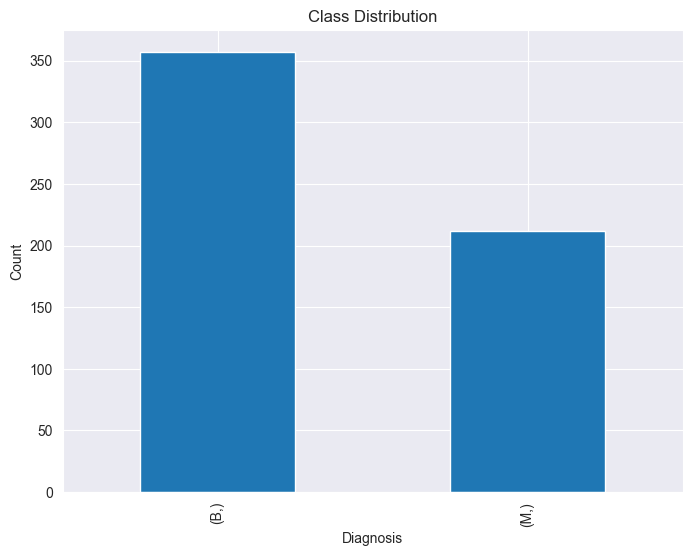

In [97]:
import matplotlib.pyplot as plt

# plot class distribution
plt.figure(figsize=(8,6))
y.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [103]:
# balance training set
smt = SMOTE()
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [106]:
X_train_balanced.shape, y_train_balanced.shape

((572, 30), (572, 1))

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# fit model
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)

C:\Users\ngoct\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ngoct\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
# make predictions
y_pred = model.predict(X_test)

In [109]:
# evaluate model performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
Confusion Matrix: [[70  1]
 [ 3 40]]
Classification Report:               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114
